<a href="https://colab.research.google.com/github/Ruvindya/ResearchProject-PreProcessing/blob/main/HiSeqV2_MutualInformation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [18]:
import os
os.chdir('/content/drive/My Drive/RESEACH/TCGA Cervical Cancer (CESC)/gene expression RNAseq IlluminaHiSeq (n=308) TCGA ')

In [19]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('After_subtypes_simplified_HiSeqV2')

In [20]:
df

,SampleID,ARHGEF10L,HIF3A,RNF17,RNF10,RNF11,RNF13,GTF2IP1,REM1,MTVR2,...,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS,histological_type
0,TCGA-EA-A3HT-01,0.725318,0.189987,0.174594,0.496180,0.617883,0.637369,0.565425,0.609614,0.000000,...,0.000000,0.560584,0.255231,0.497724,0.626944,0.515713,0.222879,0.316847,0.405340,Cervical Squamous Cell Carcinoma
1,TCGA-FU-A3HZ-01,0.444151,0.248211,0.000000,0.561269,0.463589,0.230653,0.652436,0.324709,0.000000,...,0.290987,0.506421,0.479059,0.400047,0.302075,0.322926,0.267669,0.313092,0.530207,Cervical Squamous Cell Carcinoma
2,TCGA-FU-A3TQ-01,0.837766,0.230985,0.374522,0.554383,0.829937,0.389478,0.630412,0.516601,0.000000,...,0.000000,0.582022,0.705226,0.578096,0.420560,0.428795,0.444500,0.612588,0.361471,Cervical Squamous Cell Carcinoma
3,TCGA-DS-A0VK-01,0.564916,0.389652,0.450002,0.518949,0.531938,0.716303,0.719264,0.379869,0.154458,...,0.000000,0.446650,0.000000,0.369243,0.522974,0.751170,0.513679,0.660377,0.407865,Cervical Squamous Cell Carcinoma
4,TCGA-UC-A7PG-01,0.772081,0.413758,0.088769,0.665259,0.608024,0.331768,0.661789,0.486976,0.000000,...,0.115226,0.426500,0.225709,0.499123,0.588495,0.450644,0.511162,0.432341,0.405667,Cervical Squamous Cell Carcinoma
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,TCGA-MY-A5BF-01,0.556710,0.122052,0.147576,0.556544,0.713526,0.665668,0.259738,0.277640,0.000000,...,0.000000,0.540330,0.000000,0.538678,0.523095,0.698141,0.184597,0.233885,0.423132,Cervical Squamous Cell Carcinoma
297,TCGA-EA-A556-01,0.388797,0.809501,0.000000,0.687726,0.501289,0.308968,0.821602,0.682432,0.000000,...,0.000000,0.280758,0.661005,0.545202,0.493125,0.562874,0.430963,0.260699,0.485921,Adenocarcinoma
298,TCGA-IR-A3LA-01,0.576657,0.273252,0.000000,0.478287,0.494694,0.659674,0.769528,0.449023,0.218567,...,0.089884,0.340676,0.224760,0.635093,0.261346,0.323549,0.764273,0.388770,0.801592,Adenocarcinoma
299,TCGA-VS-AA62-01,0.364161,0.200194,0.092233,0.569914,0.392592,0.609657,0.604375,0.396689,0.000000,...,0.000000,0.703145,0.475191,0.476143,0.684026,0.480346,0.681699,0.480234,0.454319,Cervical Squamous Cell Carcinoma


In [21]:
# Step 2: Remove the first column (index 0)
df.drop(df.columns[0], axis=1, inplace=True)

In [22]:
df

,ARHGEF10L,HIF3A,RNF17,RNF10,RNF11,RNF13,GTF2IP1,REM1,MTVR2,RTN4RL2,...,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS,histological_type
0,0.725318,0.189987,0.174594,0.496180,0.617883,0.637369,0.565425,0.609614,0.000000,0.309544,...,0.000000,0.560584,0.255231,0.497724,0.626944,0.515713,0.222879,0.316847,0.405340,Cervical Squamous Cell Carcinoma
1,0.444151,0.248211,0.000000,0.561269,0.463589,0.230653,0.652436,0.324709,0.000000,0.155517,...,0.290987,0.506421,0.479059,0.400047,0.302075,0.322926,0.267669,0.313092,0.530207,Cervical Squamous Cell Carcinoma
2,0.837766,0.230985,0.374522,0.554383,0.829937,0.389478,0.630412,0.516601,0.000000,0.203788,...,0.000000,0.582022,0.705226,0.578096,0.420560,0.428795,0.444500,0.612588,0.361471,Cervical Squamous Cell Carcinoma
3,0.564916,0.389652,0.450002,0.518949,0.531938,0.716303,0.719264,0.379869,0.154458,0.651326,...,0.000000,0.446650,0.000000,0.369243,0.522974,0.751170,0.513679,0.660377,0.407865,Cervical Squamous Cell Carcinoma
4,0.772081,0.413758,0.088769,0.665259,0.608024,0.331768,0.661789,0.486976,0.000000,0.379164,...,0.115226,0.426500,0.225709,0.499123,0.588495,0.450644,0.511162,0.432341,0.405667,Cervical Squamous Cell Carcinoma
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,0.556710,0.122052,0.147576,0.556544,0.713526,0.665668,0.259738,0.277640,0.000000,0.479031,...,0.000000,0.540330,0.000000,0.538678,0.523095,0.698141,0.184597,0.233885,0.423132,Cervical Squamous Cell Carcinoma
297,0.388797,0.809501,0.000000,0.687726,0.501289,0.308968,0.821602,0.682432,0.000000,0.578683,...,0.000000,0.280758,0.661005,0.545202,0.493125,0.562874,0.430963,0.260699,0.485921,Adenocarcinoma
298,0.576657,0.273252,0.000000,0.478287,0.494694,0.659674,0.769528,0.449023,0.218567,0.150302,...,0.089884,0.340676,0.224760,0.635093,0.261346,0.323549,0.764273,0.388770,0.801592,Adenocarcinoma
299,0.364161,0.200194,0.092233,0.569914,0.392592,0.609657,0.604375,0.396689,0.000000,0.259224,...,0.000000,0.703145,0.475191,0.476143,0.684026,0.480346,0.681699,0.480234,0.454319,Cervical Squamous Cell Carcinoma


In [23]:
from sklearn.feature_selection import SelectKBest,mutual_info_classif

In [24]:
X = df.iloc[:,0:-1]
y = df["histological_type"]

In [25]:
mic = SelectKBest(score_func=mutual_info_classif,k=3)

In [26]:
mic

SelectKBest(k=3, score_func=<function mutual_info_classif at 0x7e0ed65c6f80>)

In [27]:
# use fit and get the mutual score score
mic.fit(X,y)
feature_MI_score = pd.Series(mic.scores_,index=X.columns)
feature_MI_score.sort_values(ascending=False)

CLCA2        0.287694
PLCH1        0.281889
TP63         0.280815
SLC6A20      0.261245
GPR109A      0.260355
               ...   
CSF2         0.000000
LAMA2        0.000000
SNAP23       0.000000
SCARB2       0.000000
LOC400696    0.000000
Length: 20130, dtype: float64

In [28]:
# Count the number of features with a score of zero
zero_score_features = feature_MI_score[feature_MI_score == 0]
num_zero_score_features = len(zero_score_features)
num_zero_score_features

5949

In [29]:
# or directly use fit and transform and get the top k features according to Mutual Score
df_loan_afs=mic.fit_transform(X,y)
#feature_MI_score = pd.Series(mic.scores_,index=X.columns)
#feature_MI_score.sort_values(ascending=False)
df_loan_afs.shape

(301, 3)

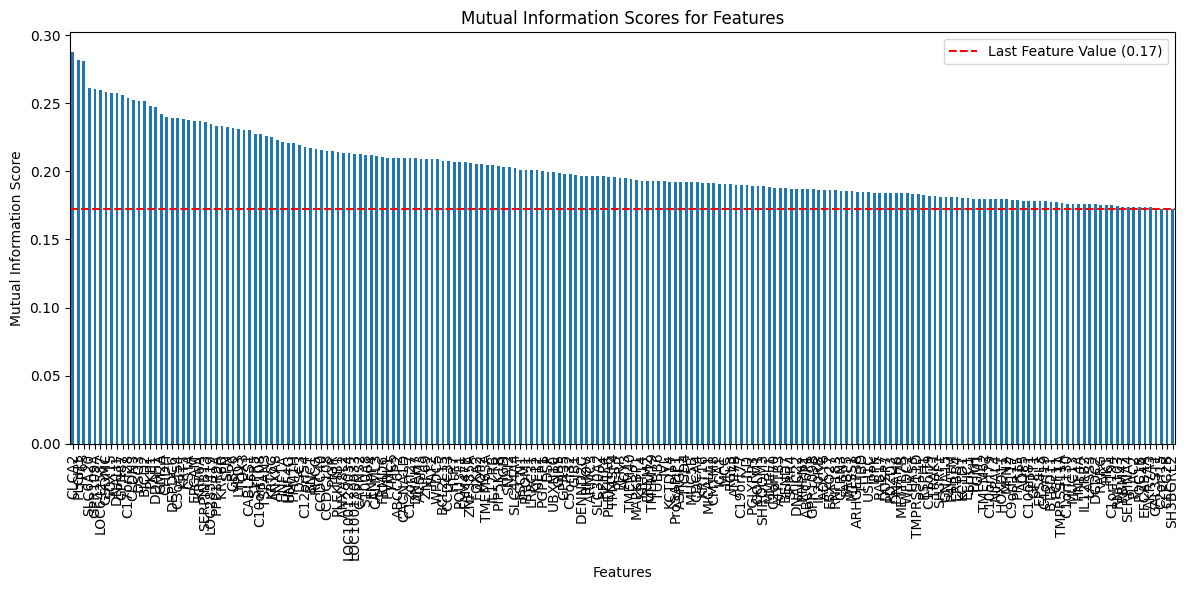

In [30]:
# Sort the scores in descending order
sorted_feature_MI_score = feature_MI_score.sort_values(ascending=False).head(200)

# Create a bar plot
plt.figure(figsize=(12, 6))
sorted_feature_MI_score.plot(kind='bar')
plt.title('Mutual Information Scores for Features')
plt.xlabel('Features')
plt.ylabel('Mutual Information Score')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability if needed

# Add a horizontal line for the last feature value
last_feature_value = sorted_feature_MI_score.iloc[-1]
plt.axhline(y=last_feature_value, color='red', linestyle='--', label=f'Last Feature Value ({last_feature_value:.2f})')

plt.legend()

plt.tight_layout()
plt.show()

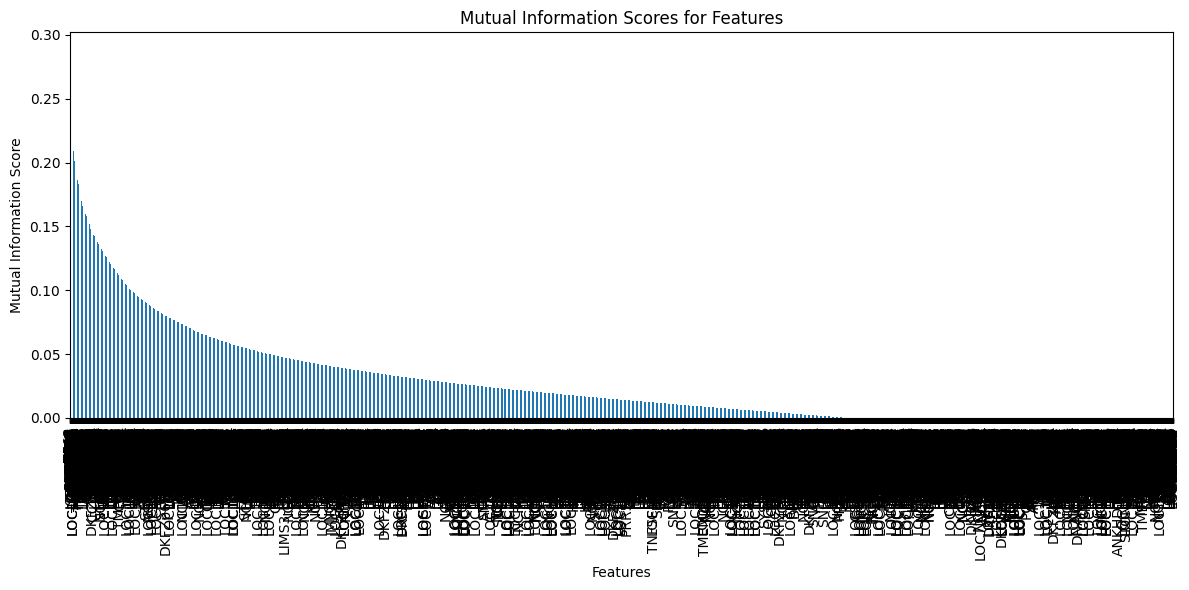

In [31]:
# Sort the scores in descending order
sorted_feature_MI_score = feature_MI_score.sort_values(ascending=False)

# Create a bar plot
plt.figure(figsize=(12, 6))
sorted_feature_MI_score.plot(kind='bar')
plt.title('Mutual Information Scores for Features')
plt.xlabel('Features')
plt.ylabel('Mutual Information Score')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability if needed
plt.tight_layout()
plt.show()